# Crocodile Dataset

## Initial Data Load & Exploration

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('crocodile_dataset.csv')
#df.head()
#df.shape
#df.info()
#df.nunique()
#df.describe()
#df.isnull().sum().sort_values(ascending=False)
#df.dtypes

### Data Cleaning

In [2]:
df.columns
df["Date of Observation"] = pd.to_datetime(
    df["Date of Observation"], 
    format="%d-%m-%Y",  # day-month-year
    errors="coerce"
)


### Feature Analysis

In [3]:
import matplotlib.pyplot as plt

print(df["Observed Length (m)"].describe())
#df[df["Observed Length (m)"] < 0.5] #min value = 0.14m, wanted to check if it was realistic. it is because it includes hatchlings.
print(df["Observed Weight (kg)"].describe())

#Histogram
'''
df["Observed Weight (kg)"].hist(bins=30)
plt.xlabel("Length (kg)")
plt.ylabel("Count")
plt.title("Observed Weight Distribution")
plt.show()'''

count    1000.000000
mean        2.415110
std         1.097542
min         0.140000
25%         1.637500
50%         2.430000
75%         3.010000
max         6.120000
Name: Observed Length (m), dtype: float64
count    1000.000000
mean      155.771900
std       175.186788
min         4.400000
25%        53.225000
50%       100.600000
75%       168.875000
max      1139.700000
Name: Observed Weight (kg), dtype: float64


'\ndf["Observed Weight (kg)"].hist(bins=30)\nplt.xlabel("Length (kg)")\nplt.ylabel("Count")\nplt.title("Observed Weight Distribution")\nplt.show()'

### Feature Engineering

#### Extraction of Date Features

In [4]:
df["Date of Observation"] = pd.to_datetime(df["Date of Observation"], errors="coerce")
df["Year"] = df["Date of Observation"].dt.year
df["Month"] = df["Date of Observation"].dt.month
df["Season"] = df["Month"] % 12 // 3 + 1 # 1=winter, 2=spring, 3=summer, 4=fall
df.drop("Date of Observation", axis=1, inplace = True)
numeric_cols = ["Observed Length (m)", "Observed Weight (kg)", "Year", "Month", "Season"]
categorical_cols = ["Genus", "Sex", "Country/Region", "Habitat Type"]

#### Age Mapping

In [5]:
age_mapping = {"Hatchling": 0, "Juvenile": 1, "Subadult": 2, "Adult": 3, "Unknown": 4}
['Adult', 'Juvenile', 'Subadult', 'Hatchling']
df["Age Class"] = df["Age Class"].map(age_mapping)
numeric_cols.append("Age Class")

In [6]:
#df.head()

# Exploration of Data

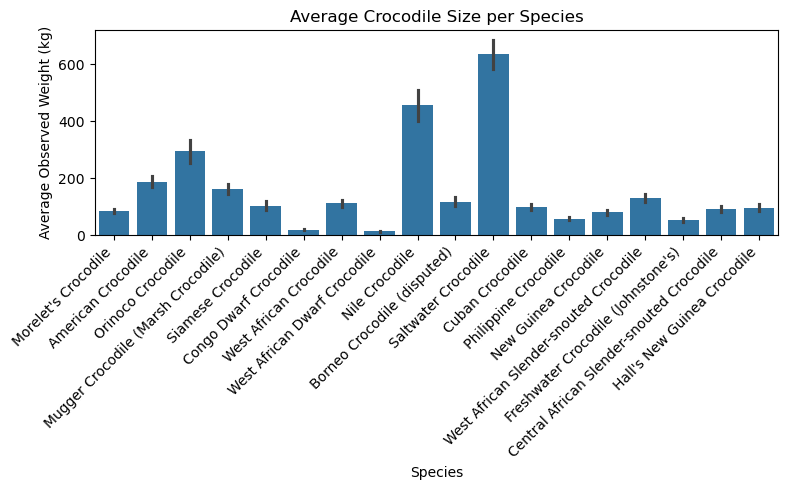

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='Common Name', y='Observed Weight (kg)', data=df, estimator='mean')
plt.xticks(rotation=45, ha='right')  # rotate labels and align to the right
plt.title('Average Crocodile Size per Species')
plt.xlabel('Species')
plt.ylabel('Average Observed Weight (kg)')
plt.tight_layout() 
plt.title('Average Crocodile Size per Species')
plt.show()


### Analysis of Commonly Confused Species

Based on model predictions, let's examine the similarities between species that are often misclassified:
1. **Hall's New Guinea Crocodile** vs **New Guinea Crocodile**
2. **Mugger Crocodile (Marsh Crocodile)** vs **Nile Crocodile**

In [42]:
# First, let's check what species we have in our dataset
print("Unique species in dataset:")
species_counts = df['Common Name'].value_counts()
print(species_counts)
print(f"\nTotal species: {len(species_counts)}")

# Define the confused species pairs
confused_pairs = [
    ("Hall's New Guinea Crocodile", "New Guinea Crocodile"),
    ("Mugger Crocodile (Marsh Crocodile)", "Nile Crocodile")
]

# Check if these species exist in our dataset
print("\nChecking for confused species pairs:")
for pair in confused_pairs:
    species1, species2 = pair
    count1 = species_counts.get(species1, 0)
    count2 = species_counts.get(species2, 0)
    print(f"{species1}: {count1} samples")
    print(f"{species2}: {count2} samples")
    print()

Unique species in dataset:
Common Name
New Guinea Crocodile                         68
Borneo Crocodile (disputed)                  67
American Crocodile                           66
Morelet's Crocodile                          64
Cuban Crocodile                              59
Orinoco Crocodile                            58
Philippine Crocodile                         58
Saltwater Crocodile                          58
West African Dwarf Crocodile                 57
Central African Slender-snouted Crocodile    56
West African Slender-snouted Crocodile       55
West African Crocodile                       52
Hall's New Guinea Crocodile                  49
Congo Dwarf Crocodile                        48
Nile Crocodile                               48
Mugger Crocodile (Marsh Crocodile)           47
Siamese Crocodile                            45
Freshwater Crocodile (Johnstone's)           45
Name: count, dtype: int64

Total species: 18

Checking for confused species pairs:
Hall's New Gui

#### Comparative Analysis: Physical Characteristics

In [45]:
# Function to create comparison plots for any two species
def compare_species_characteristics(df, species1, species2):
    """Create comprehensive comparison plots between two species"""
    
    # Filter data for the two species
    species_data = df[df['Common Name'].isin([species1, species2])].copy()
    
    if len(species_data) == 0:
        print(f"No data found for {species1} or {species2}")
        return
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Comparative Analysis: {species1} vs {species2}', fontsize=16, fontweight='bold')
    
    # 1. Length Distribution
    axes[0,0].hist(species_data[species_data['Common Name']==species1]['Observed Length (m)'], 
                   alpha=0.7, label=species1, bins=15, color='blue')
    axes[0,0].hist(species_data[species_data['Common Name']==species2]['Observed Length (m)'], 
                   alpha=0.7, label=species2, bins=15, color='red')
    axes[0,0].set_xlabel('Length (m)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_title('Length Distribution')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Weight Distribution
    axes[0,1].hist(species_data[species_data['Common Name']==species1]['Observed Weight (kg)'], 
                   alpha=0.7, label=species1, bins=15, color='blue')
    axes[0,1].hist(species_data[species_data['Common Name']==species2]['Observed Weight (kg)'], 
                   alpha=0.7, label=species2, bins=15, color='red')
    axes[0,1].set_xlabel('Weight (kg)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_title('Weight Distribution')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Length vs Weight Scatter
    for species, color in [(species1, 'blue'), (species2, 'red')]:
        data = species_data[species_data['Common Name']==species]
        axes[0,2].scatter(data['Observed Length (m)'], data['Observed Weight (kg)'], 
                         alpha=0.6, label=species, s=50, color=color)
    axes[0,2].set_xlabel('Length (m)')
    axes[0,2].set_ylabel('Weight (kg)')
    axes[0,2].set_title('Length vs Weight Relationship')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Age Class Distribution
    age_order = ['Hatchling', 'Juvenile', 'Subadult', 'Adult']
    age_mapping_rev = {0: 'Hatchling', 1: 'Juvenile', 2: 'Subadult', 3: 'Adult', 4: 'Unknown'}
    species_data['Age Class Name'] = species_data['Age Class'].map(age_mapping_rev)
    
    age_counts = species_data.groupby(['Common Name', 'Age Class Name']).size().unstack(fill_value=0)
    age_counts.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'lightgreen', 'orange', 'salmon', 'gray'])
    axes[1,0].set_title('Age Class Distribution')
    axes[1,0].set_xlabel('Species')
    axes[1,0].set_ylabel('Count')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].legend(title='Age Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 5. Habitat Distribution
    if 'Habitat Type' in species_data.columns:
        habitat_counts = species_data.groupby(['Common Name', 'Habitat Type']).size().unstack(fill_value=0)
        habitat_counts.plot(kind='bar', ax=axes[1,1], stacked=True)
        axes[1,1].set_title('Habitat Distribution')
        axes[1,1].set_xlabel('Species')
        axes[1,1].set_ylabel('Count')
        axes[1,1].tick_params(axis='x', rotation=45)
        axes[1,1].legend(title='Habitat', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 6. Geographic Distribution
    if 'Country/Region' in species_data.columns:
        geo_counts = species_data.groupby(['Common Name', 'Country/Region']).size().unstack(fill_value=0)
        # Show only top 5 countries for readability
        top_countries = geo_counts.sum().nlargest(5).index
        geo_counts_top = geo_counts[top_countries]
        geo_counts_top.plot(kind='bar', ax=axes[1,2])
        axes[1,2].set_title('Geographic Distribution (Top 5 Countries)')
        axes[1,2].set_xlabel('Species')
        axes[1,2].set_ylabel('Count')
        axes[1,2].tick_params(axis='x', rotation=45)
        axes[1,2].legend(title='Country/Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary
    print(f"\nStatistical Summary for {species1} vs {species2}:")
    print("="*60)
    for species in [species1, species2]:
        data = species_data[species_data['Common Name']==species]
        print(f"\n{species} (n={len(data)}):")
        print(f"  Length: {data['Observed Length (m)'].mean():.2f}±{data['Observed Length (m)'].std():.2f} m")
        print(f"  Weight: {data['Observed Weight (kg)'].mean():.1f}±{data['Observed Weight (kg)'].std():.1f} kg")
        print(f"  Length range: {data['Observed Length (m)'].min():.2f} - {data['Observed Length (m)'].max():.2f} m")
        print(f"  Weight range: {data['Observed Weight (kg)'].min():.1f} - {data['Observed Weight (kg)'].max():.1f} kg")

New Guinea species found:
  - New Guinea Crocodile (68 samples)
  - Hall's New Guinea Crocodile (49 samples)

Mugger/Marsh/Nile species found:
  - Mugger Crocodile (Marsh Crocodile) (47 samples)
  - Nile Crocodile (48 samples)

COMPARISON 1: NEW GUINEA CROCODILE SPECIES


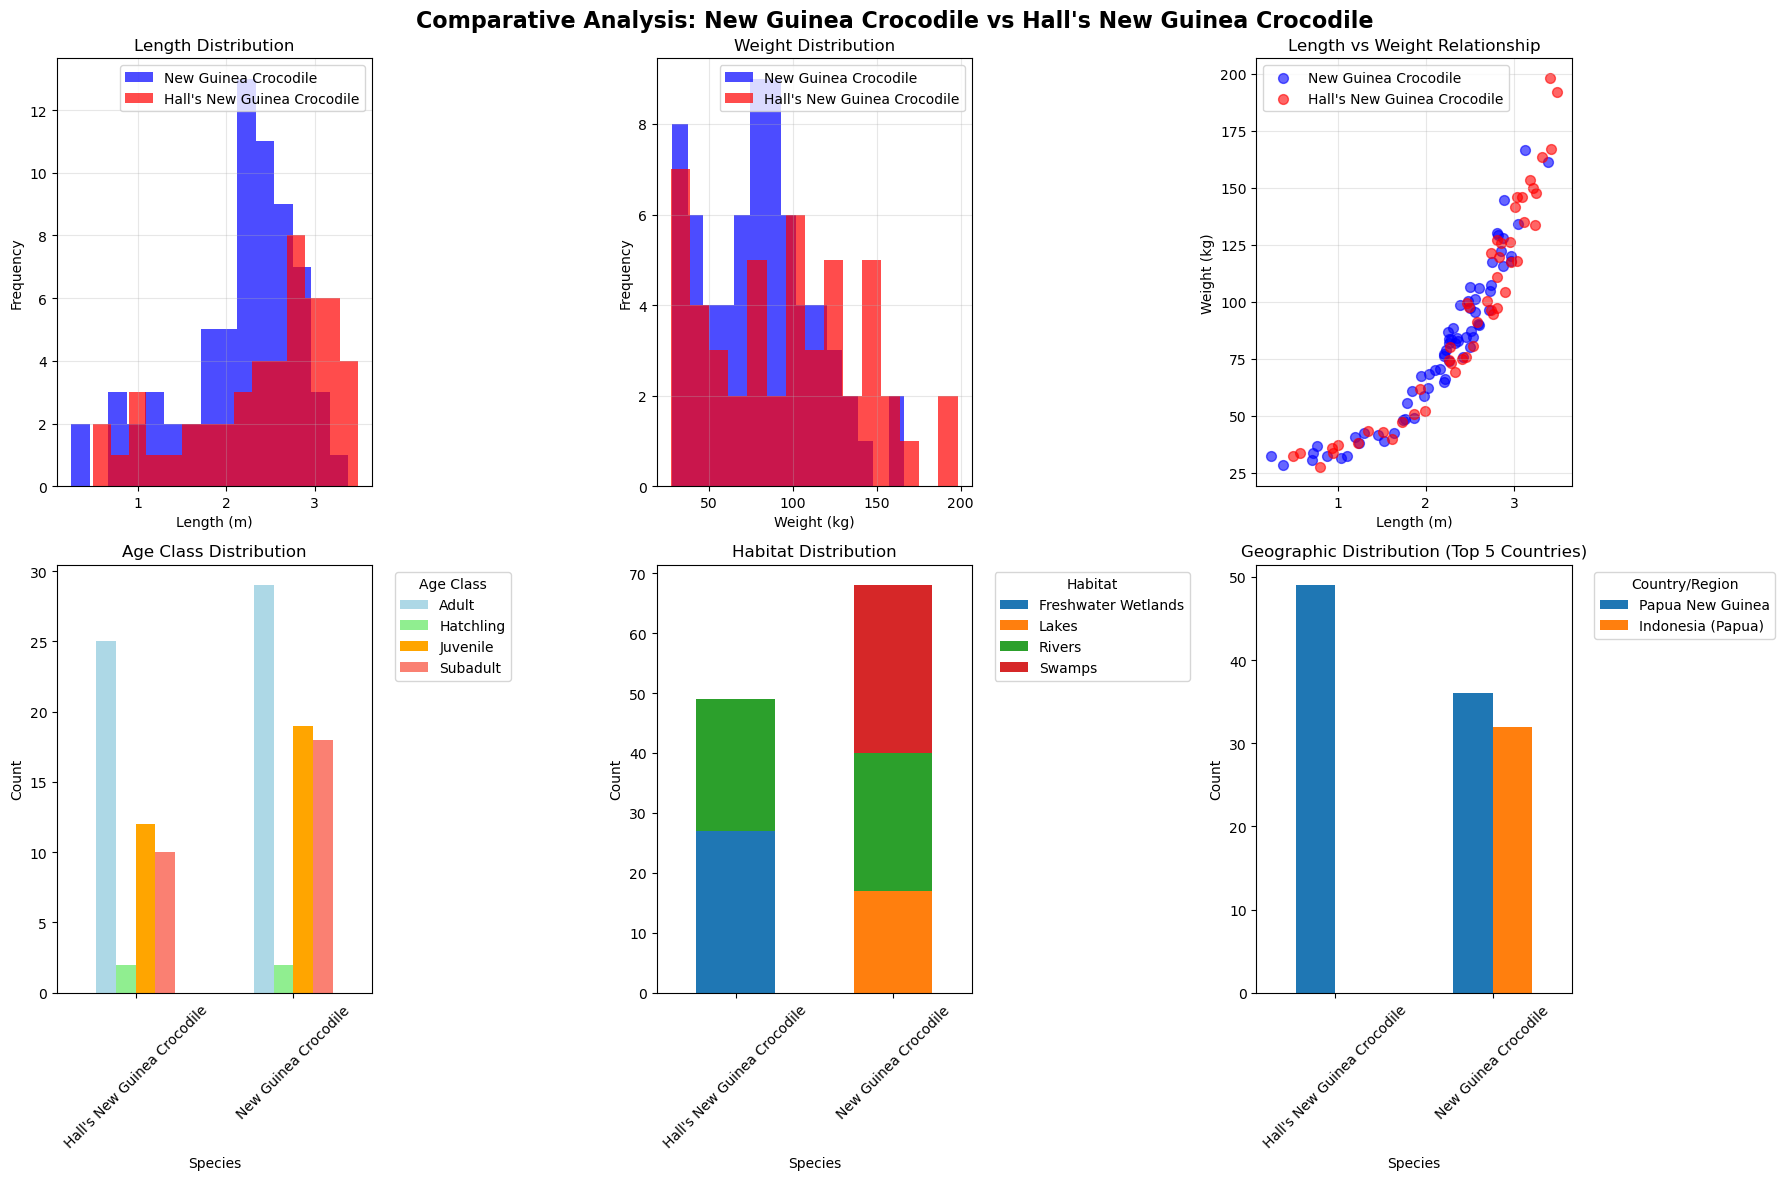


Statistical Summary for New Guinea Crocodile vs Hall's New Guinea Crocodile:

New Guinea Crocodile (n=68):
  Length: 2.15±0.69 m
  Weight: 80.4±33.3 kg
  Length range: 0.24 - 3.38 m
  Weight range: 28.4 - 166.5 kg

Hall's New Guinea Crocodile (n=49):
  Length: 2.40±0.82 m
  Weight: 96.5±45.5 kg
  Length range: 0.49 - 3.49 m
  Weight range: 27.7 - 198.2 kg

COMPARISON 2: MUGGER vs NILE CROCODILE SPECIES


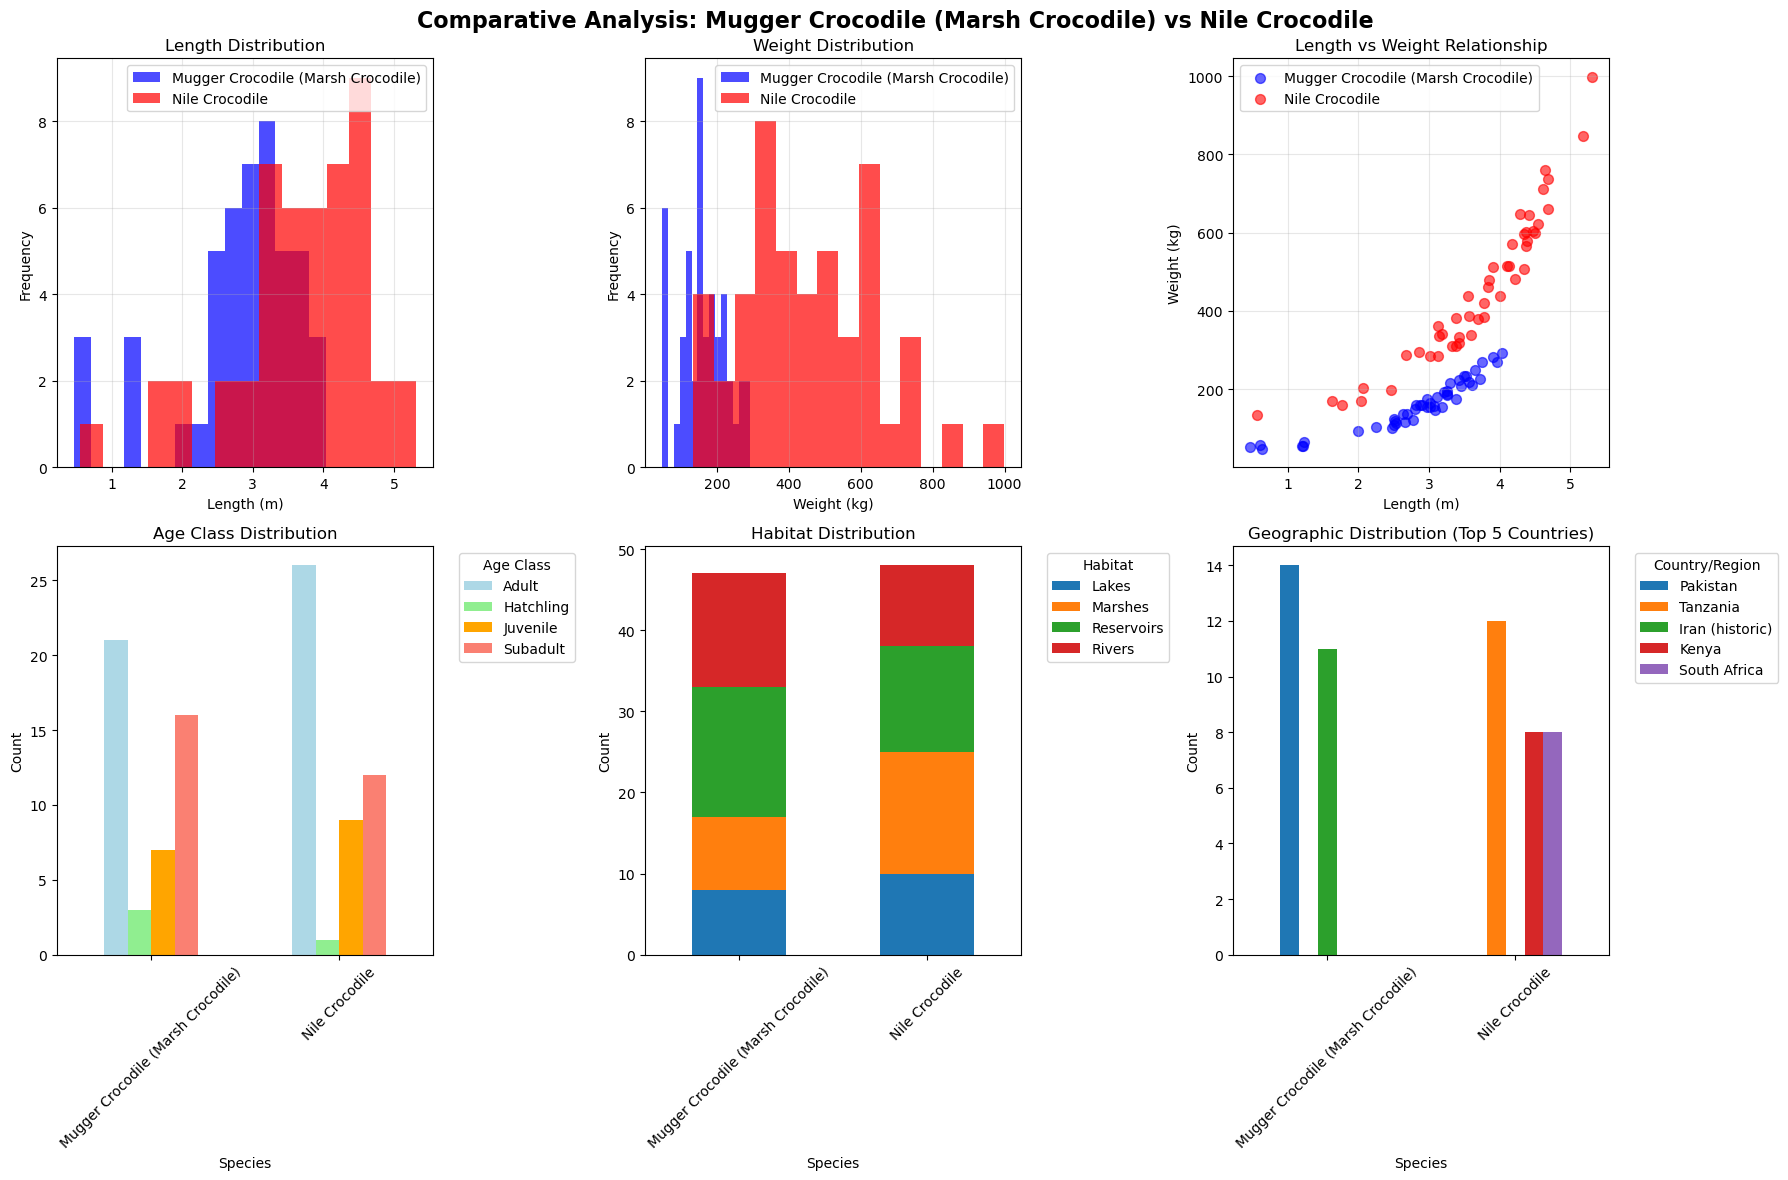


Statistical Summary for Mugger Crocodile (Marsh Crocodile) vs Nile Crocodile:

Mugger Crocodile (Marsh Crocodile) (n=47):
  Length: 2.82±0.88 m
  Weight: 161.2±64.2 kg
  Length range: 0.47 - 4.03 m
  Weight range: 47.8 - 292.8 kg

Nile Crocodile (n=48):
  Length: 3.67±0.96 m
  Weight: 456.0±191.0 kg
  Length range: 0.56 - 5.31 m
  Weight range: 133.9 - 998.3 kg


In [46]:
guinea_species = ['New Guinea Crocodile', "Hall's New Guinea Crocodile"]
mugger_nile_species = ['Mugger Crocodile (Marsh Crocodile)', 'Nile Crocodile']

print("New Guinea species found:")
for species in guinea_species:
    count = (df['Common Name'] == species).sum()
    print(f"  - {species} ({count} samples)")

print("\nMugger/Marsh/Nile species found:")
for species in mugger_nile_species:
    count = (df['Common Name'] == species).sum()
    print(f"  - {species} ({count} samples)")

# Create comparisons for both groups
print(f"\n{'='*60}")
print("COMPARISON 1: NEW GUINEA CROCODILE SPECIES")
print(f"{'='*60}")
compare_species_characteristics(df, guinea_species[0], guinea_species[1])

print(f"\n{'='*60}")
print("COMPARISON 2: MUGGER vs NILE CROCODILE SPECIES")
print(f"{'='*60}")
compare_species_characteristics(df, mugger_nile_species[0], mugger_nile_species[1])

## Categorical Encoding

I use One-Hot encoding to convert the casteogrical fewatures into numeric features.

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),  # one-hot encode categorical
        ("num", "passthrough", numeric_cols)  # keep numeric as-is
    ]
)
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])


#### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

# Drop target variable and non-predictive features
cols_to_drop = ["Common Name", "Scientific Name", "Conservation Status", 
                "Observer Name", "Notes", "Observation ID", 'Family']
X = df.drop(cols_to_drop, axis=1)  # features
y = df["Common Name"]               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.columns)


Index(['Genus', 'Observed Length (m)', 'Observed Weight (kg)', 'Age Class',
       'Sex', 'Country/Region', 'Habitat Type', 'Year', 'Month', 'Season'],
      dtype='object')


In [48]:
print("categorical_cols in pipeline:", categorical_cols)
print("Missing categorical columns from X_train:", [col for col in categorical_cols if col not in X_train.columns])




categorical_cols in pipeline: ['Genus', 'Sex', 'Country/Region', 'Habitat Type']
Missing categorical columns from X_train: []


In [49]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genus', 'Sex',
                                                   'Country/Region',
                                                   'Habitat Type']),
                                                 ('num', 'passthrough',
                                                  ['Observed Length (m)',
                                                   'Observed Weight (kg)',
                                                   'Year', 'Month', 'Season',
                                                   'Age Class'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

Accuracy: 0.965

Classification Report:
                                            precision    recall  f1-score   support

                       American Crocodile       1.00      1.00      1.00        13
              Borneo Crocodile (disputed)       1.00      1.00      1.00        13
Central African Slender-snouted Crocodile       1.00      1.00      1.00        11
                    Congo Dwarf Crocodile       1.00      1.00      1.00        10
                          Cuban Crocodile       1.00      1.00      1.00        12
       Freshwater Crocodile (Johnstone's)       1.00      1.00      1.00         9
              Hall's New Guinea Crocodile       0.71      1.00      0.83        10
                      Morelet's Crocodile       1.00      1.00      1.00        13
       Mugger Crocodile (Marsh Crocodile)       0.75      1.00      0.86         9
                     New Guinea Crocodile       1.00      0.71      0.83        14
                           Nile Crocodile    

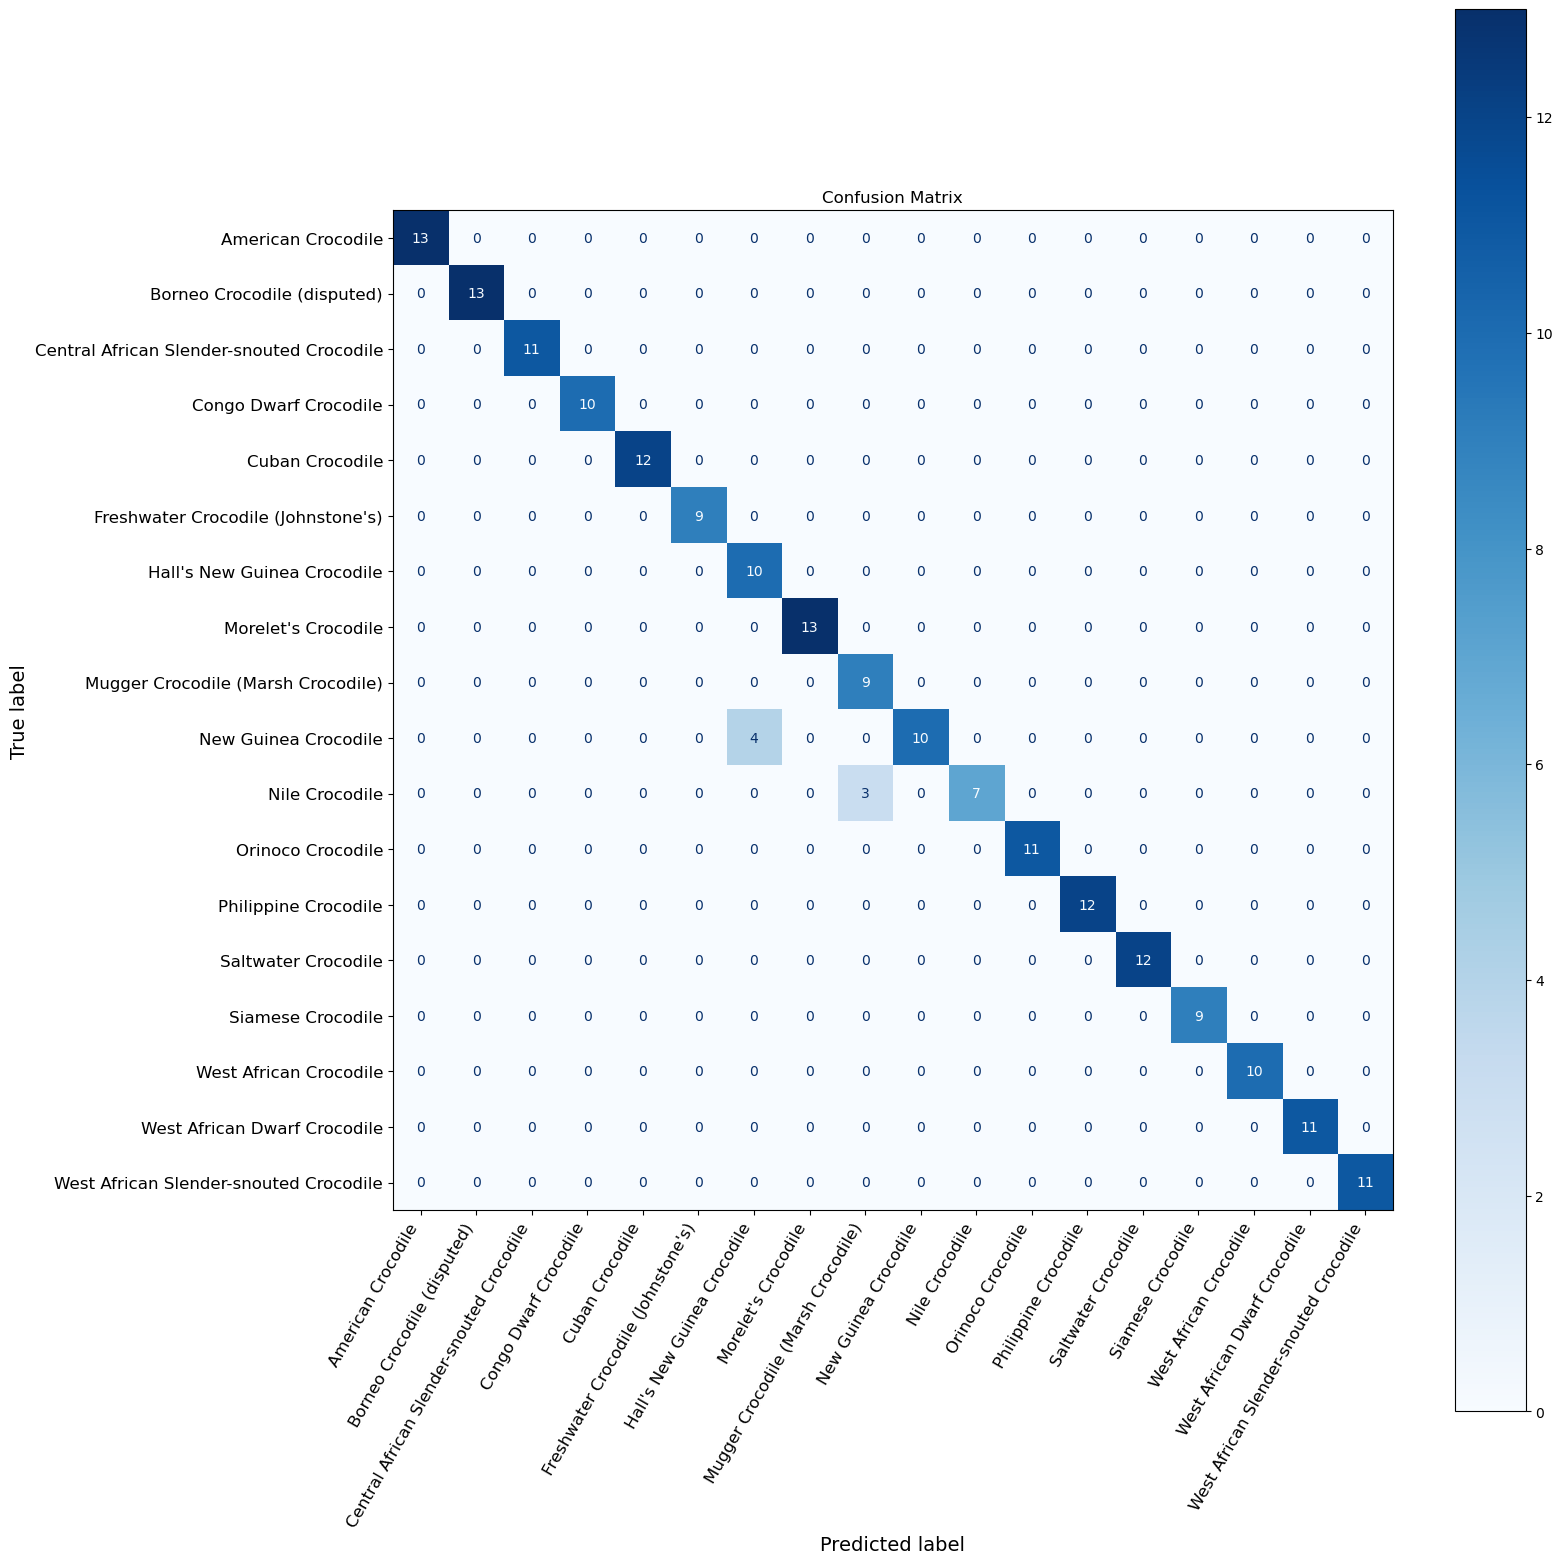

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = model_pipeline.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
fig, ax = plt.subplots(figsize=(16, 16))  # Make the figure even larger for more space
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipeline.classes_)
disp.plot(cmap="Blues", ax=ax, xticks_rotation=60)  # Rotate x labels more steeply
plt.title("Confusion Matrix")
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel("Predicted label", fontsize=14)
plt.ylabel("True label", fontsize=14)
plt.xticks(fontsize=12, ha='right')  # Align x labels to the right
plt.yticks(fontsize=12)
plt.show()

## Feature Importance Analysis

Feature importance tells us which variables the Random Forest model considers most predictive for classifying crocodile species.

In [51]:
import numpy as np

# Get feature importance from the Random Forest model
rf_model = model_pipeline.named_steps['classifier']
feature_importance = rf_model.feature_importances_

# Get feature names after preprocessing
feature_names = []

# Add categorical feature names (after one-hot encoding)
if hasattr(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'], 'get_feature_names_out'):
    cat_features = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
    feature_names.extend(cat_features)
# Add numeric feature names
feature_names.extend(numeric_cols)

print(f"Total number of features: {len(feature_names)}")
print(f"Feature importance scores: {len(feature_importance)}")
print("\nFeature names sample:", feature_names[:10])

Total number of features: 88
Feature importance scores: 88

Feature names sample: ['Genus_Crocodylus', 'Genus_Mecistops', 'Genus_Osteolaemus', 'Sex_Female', 'Sex_Male', 'Sex_Unknown', 'Country/Region_Australia', 'Country/Region_Belize', 'Country/Region_Cambodia', 'Country/Region_Cameroon']


In [52]:
# Create a DataFrame for easier manipulation and analysis
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Display top 15 most important features
print("Top 15 Most Important Features:")
print("=" * 50)
for i, row in importance_df.head(15).iterrows():
    print(f"{row['feature']:<35} {row['importance']:.4f}")
    
print(f"\nSum of all importance scores: {importance_df['importance'].sum():.4f}")
print(f"Top 5 features account for: {importance_df.head(5)['importance'].sum():.1%} of total importance")

Top 15 Most Important Features:
Observed Weight (kg)                0.0849
Observed Length (m)                 0.0588
Country/Region_Philippines          0.0440
Country/Region_Cuba                 0.0428
Country/Region_Papua New Guinea     0.0362
Country/Region_Australia            0.0355
Genus_Mecistops                     0.0341
Country/Region_Indonesia (Papua)    0.0331
Genus_Crocodylus                    0.0304
Genus_Osteolaemus                   0.0255
Year                                0.0252
Country/Region_Malaysia (Borneo)    0.0226
Country/Region_Indonesia (Borneo)   0.0225
Country/Region_Venezuela            0.0212
Month                               0.0211

Sum of all importance scores: 1.0000
Top 5 features account for: 26.7% of total importance


### Feature Importance Visualization

#### 1. Top 20 Features

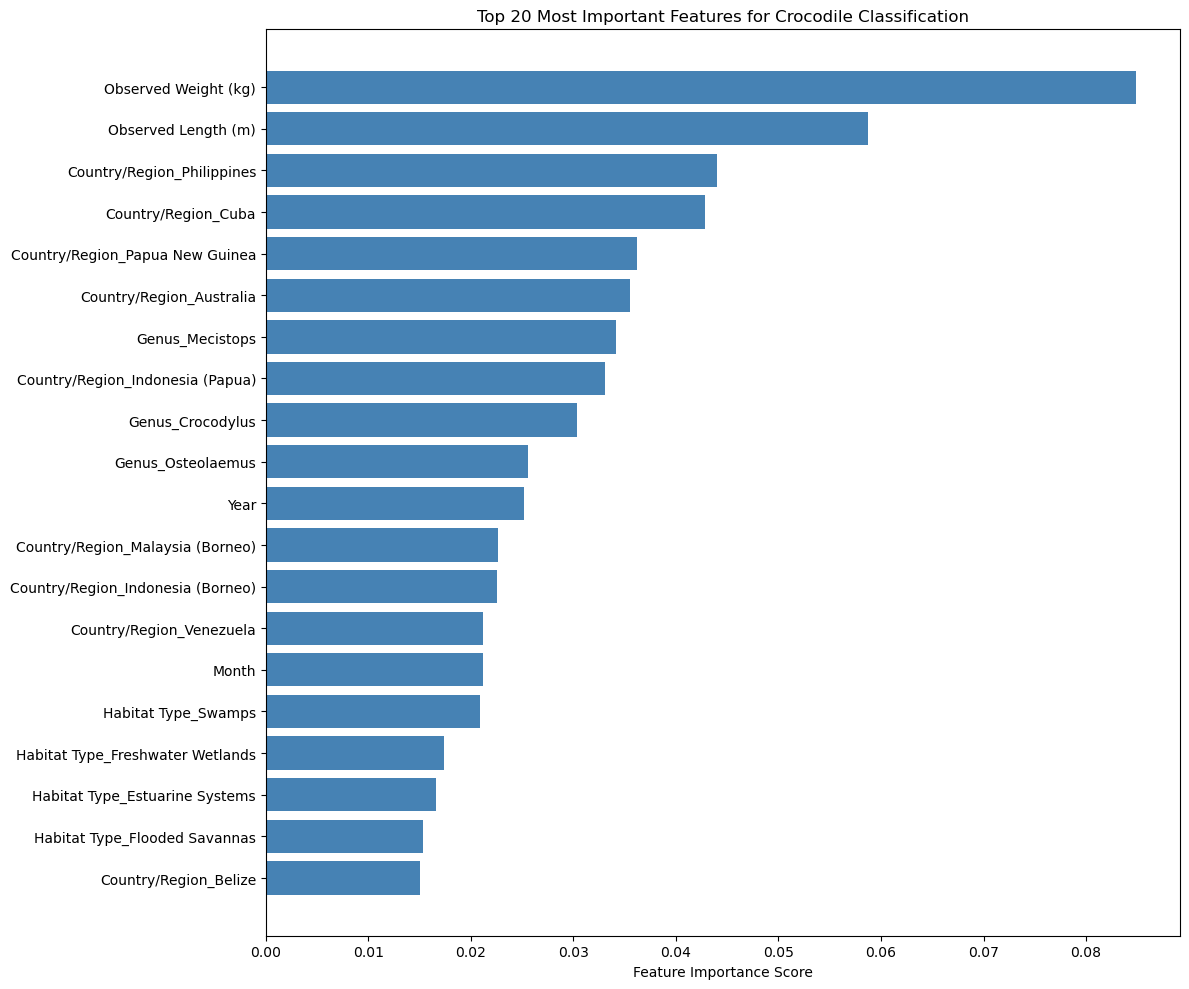

In [53]:

plt.figure(figsize=(12, 10))
top_20 = importance_df.head(20)
plt.barh(range(len(top_20)), top_20['importance'], color='steelblue')
plt.yticks(range(len(top_20)), top_20['feature'])
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Most Important Features for Crocodile Classification')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

#### 2. Cumulative Feature Importance

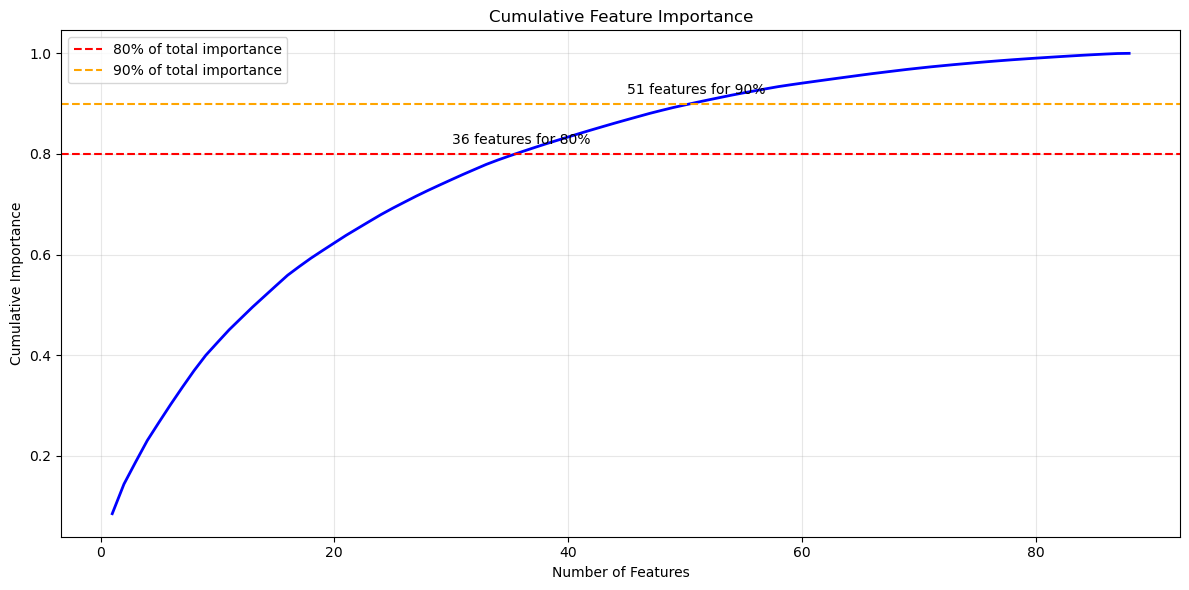

Number of features needed for 80% of importance: 36
Number of features needed for 90% of importance: 51
Total number of features: 88


In [54]:
# 3. Cumulative Feature Importance
plt.figure(figsize=(12, 6))
cumulative_importance = np.cumsum(importance_df['importance'])
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, 'b-', linewidth=2)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% of total importance')
plt.axhline(y=0.9, color='orange', linestyle='--', label='90% of total importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.legend()
plt.grid(True, alpha=0.3)

# how many features are needed for 80% and 90%
features_80 = np.where(cumulative_importance >= 0.8)[0][0] + 1
features_90 = np.where(cumulative_importance >= 0.9)[0][0] + 1
plt.text(features_80, 0.82, f'{features_80} features for 80%', fontsize=10, ha='center')
plt.text(features_90, 0.92, f'{features_90} features for 90%', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

print(f"Number of features needed for 80% of importance: {features_80}")
print(f"Number of features needed for 90% of importance: {features_90}")
print(f"Total number of features: {len(importance_df)}")

### Feature Importance Insights and Analysis

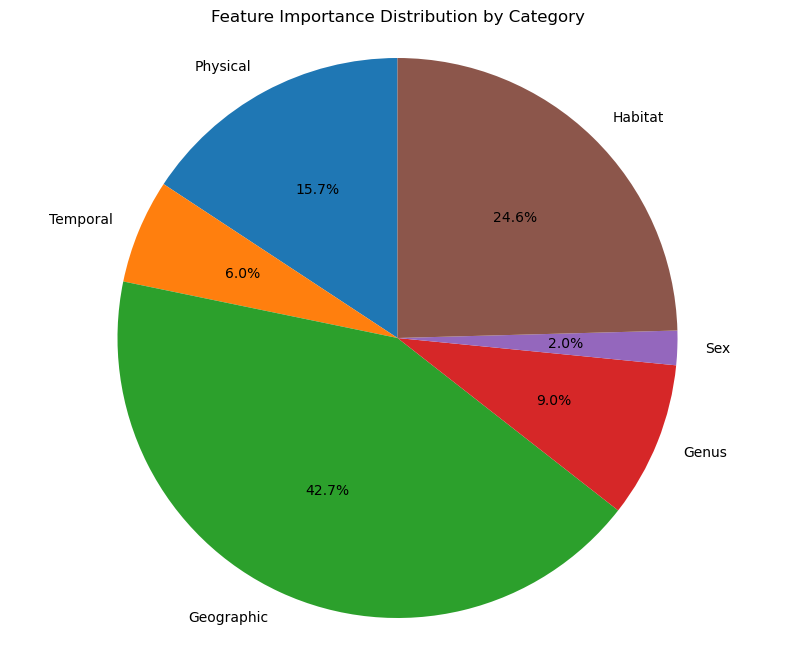


Key Insights:
- Most important category: Geographic
- Least important category: Sex
- Physical + Geographic features account for: 58.4% of total importance


In [55]:
# Analyze feature categories
feature_categories = {
    'Physical': ['Observed Length (m)', 'Observed Weight (kg)', 'Age Class'],
    'Temporal': ['Year', 'Month', 'Season'],
    'Geographic': [f for f in feature_names if f.startswith('Country/Region_')],
    'Genus': [f for f in feature_names if f.startswith('Genus_')],
    'Sex': [f for f in feature_names if f.startswith('Sex_')],
    'Habitat': [f for f in feature_names if f.startswith('Habitat Type_')]
}

category_importance = {}
for category, features in feature_categories.items():
    category_features = importance_df[importance_df['feature'].isin(features)]
    total_importance = category_features['importance'].sum()
    category_importance[category] = total_importance
    
   
# Create a summary pie chart
plt.figure(figsize=(10, 8))
categories = list(category_importance.keys())
importances = list(category_importance.values())

plt.pie(importances, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Feature Importance Distribution by Category')
plt.axis('equal')
plt.show()

print(f"\nKey Insights:")
print(f"- Most important category: {max(category_importance, key=category_importance.get)}")
print(f"- Least important category: {min(category_importance, key=category_importance.get)}")
print(f"- Physical + Geographic features account for: {(category_importance['Physical'] + category_importance['Geographic']):.1%} of total importance")